In [6]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.pyplot import stackplot

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("Agriculture.csv")

In [10]:
df.head()

,NGA,Variable,Value From,Value To,Value Note,Date From,Date To,Unit,Explanation
0,Big Island Hawaii,Carbohydrate Source 1,sweet potato,NaN,NaN,750,1800,NaN,Sweet potato was the the dominant crop in the ...
1,Big Island Hawaii,Cropping System,swidden,NaN,NaN,750,1400,NaN,Shifting cultivation (in the form of swidden a...
2,Big Island Hawaii,Cropping System Coefficient,0.23,NaN,inferred,750,1400,NaN,Generic estimate
3,Big Island Hawaii,Fertilizer Coefficient,1.3,NaN,NaN,750,1900,NaN,Assuming 30% while looking for an estimate
4,Big Island Hawaii,Fertilizers,present,NaN,inferred,750,1800,NaN,Inferred ash from slash-and-burn cultivation. ...


In [11]:
df.columns

Index(['NGA', 'Variable', 'Value From', 'Value To', 'Value Note', 'Date From',
       'Date To', 'Unit', 'Explanation'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NGA          330 non-null    object
 1   Variable     330 non-null    object
 2   Value From   330 non-null    object
 3   Value To     53 non-null     object
 4   Value Note   36 non-null     object
 5   Date From    330 non-null    int64 
 6   Date To      330 non-null    int64 
 7   Unit         61 non-null     object
 8   Explanation  330 non-null    object
dtypes: int64(2), object(7)
memory usage: 23.3+ KB


Text(0.5, 1.0, 'type of our data ')

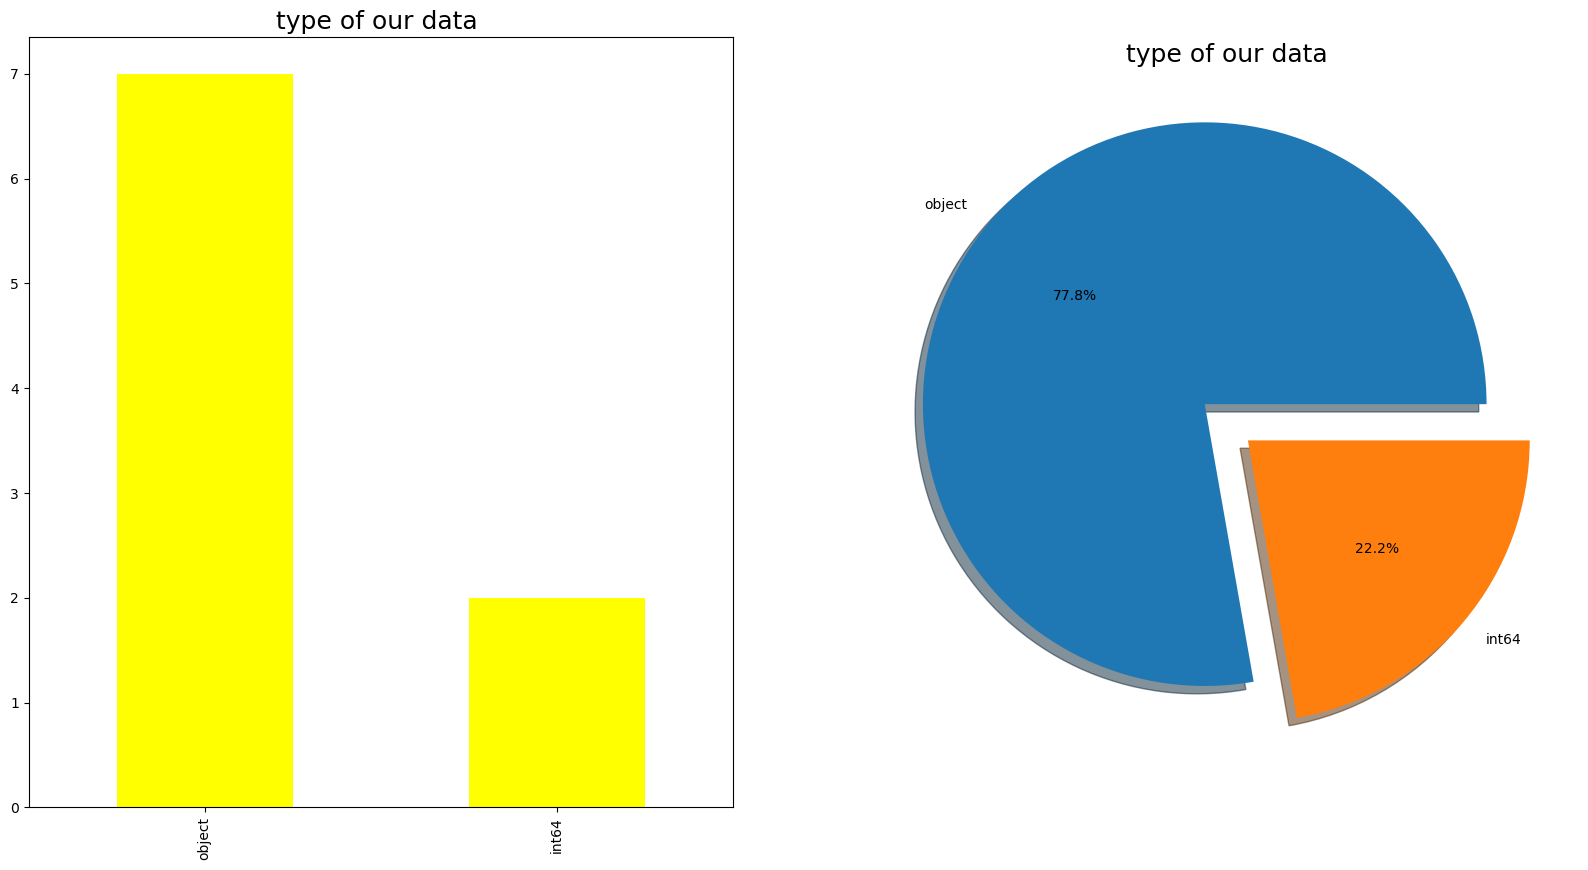

In [13]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 10))

df.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,ax=axarr[1])
axarr[1].set_title("type of our data ", fontsize=18)

df.dtypes.value_counts().plot(kind='bar',ax=axarr[0], color = 'yellow')
plt.title('type of our data', fontsize = 18);
axarr[0].set_title("type of our data ", fontsize=18)

In [14]:
df.shape

(330, 9)

In [15]:
df.isnull().sum()

NGA              0
Variable         0
Value From       0
Value To       277
Value Note     294
Date From        0
Date To          0
Unit           269
Explanation      0
dtype: int64

<Axes: >

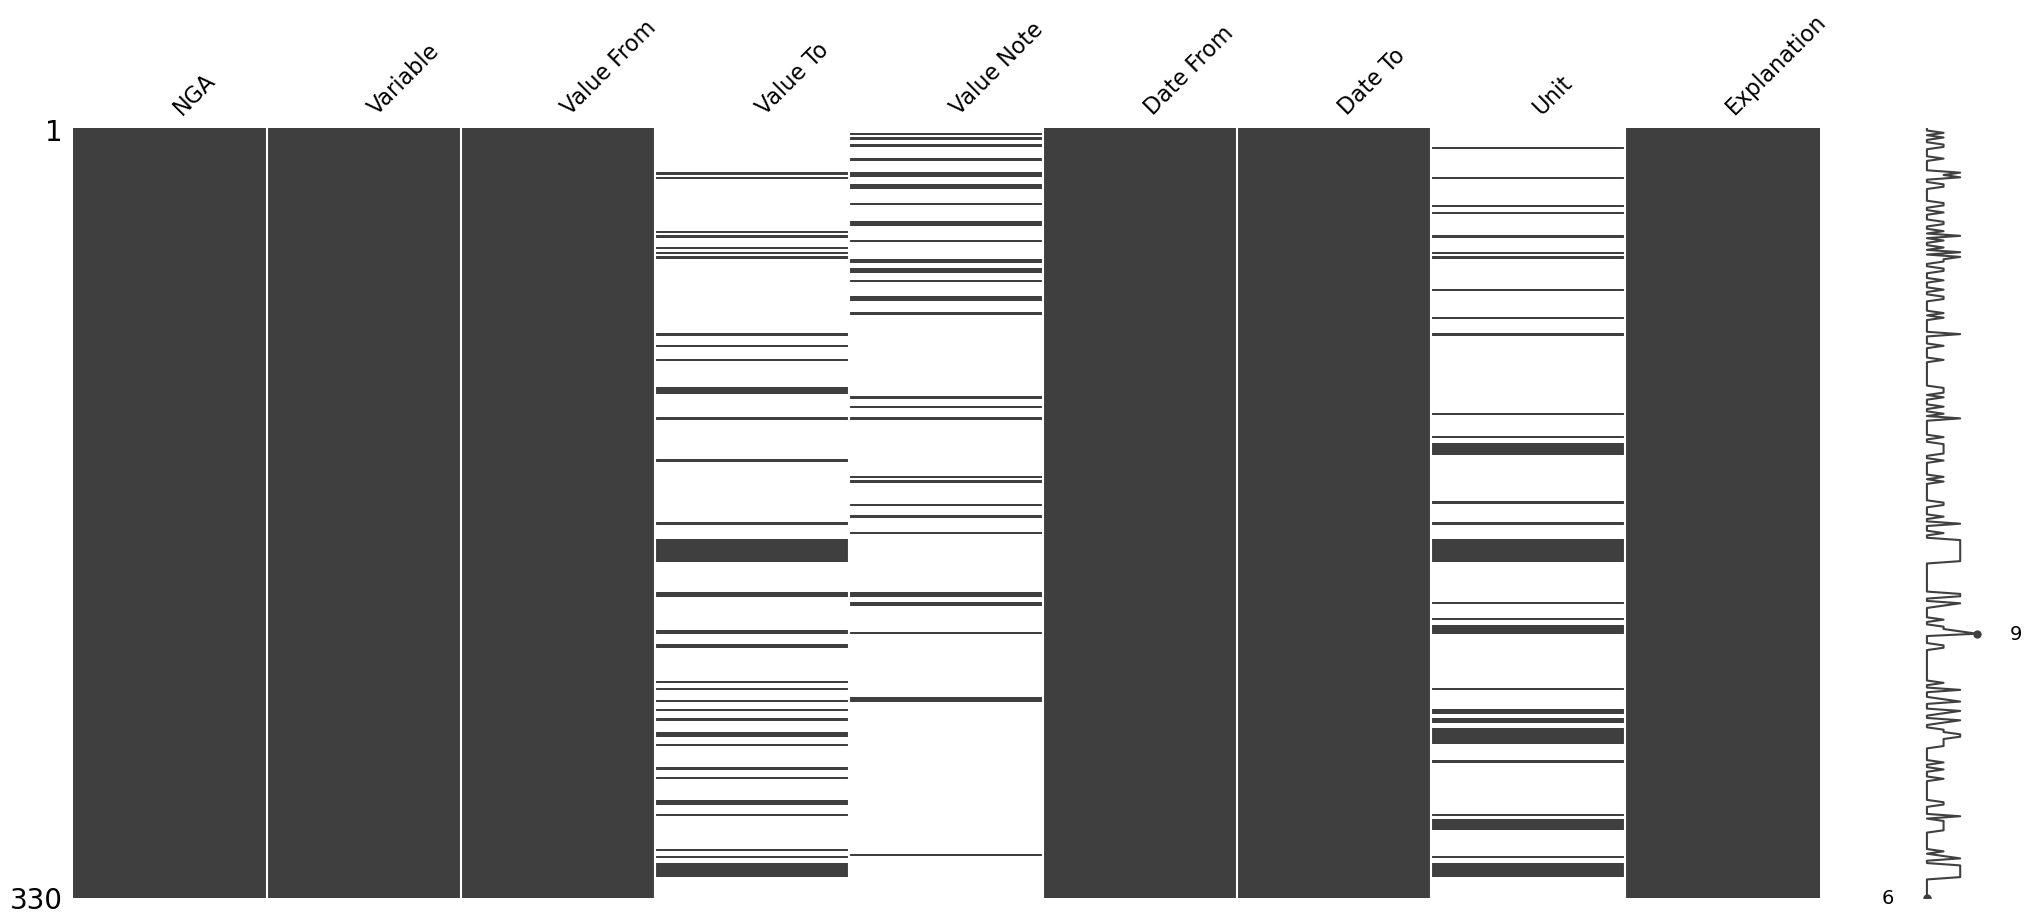

In [16]:
msno.matrix(df)

<Axes: >

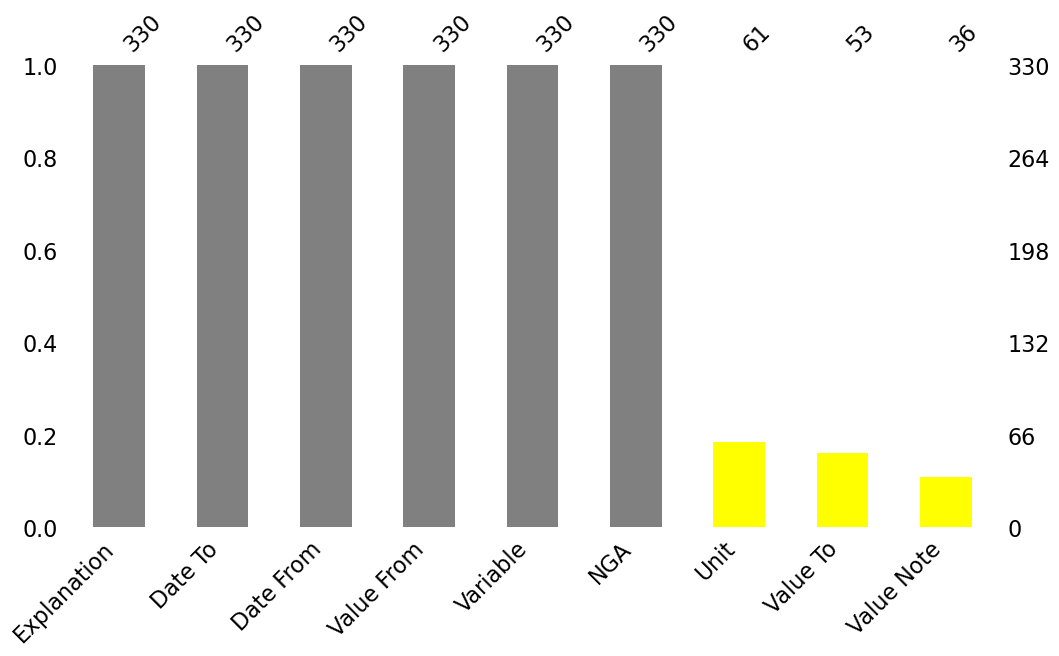

In [17]:
color = ['grey','grey','grey','grey','grey','grey','yellow', 'yellow', 'yellow']
msno.bar(df,fontsize =16, color = color, sort = 'descending', figsize = (12,6))

<Axes: >

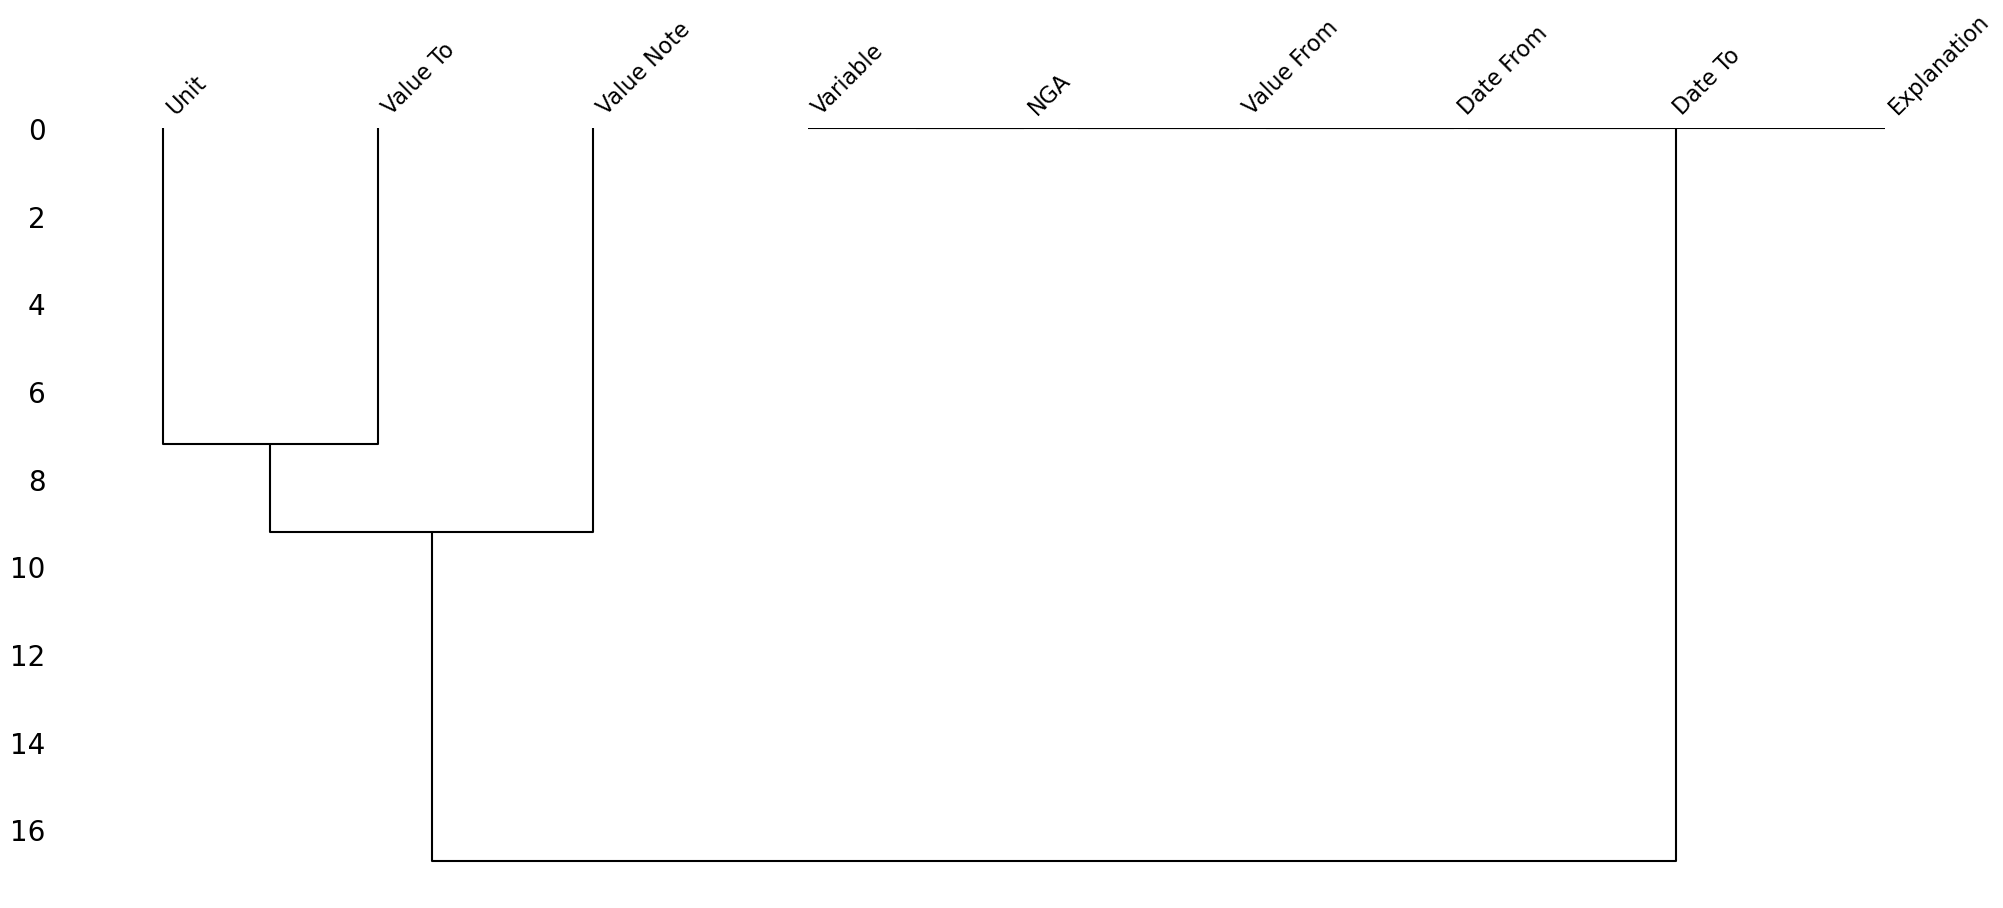

In [18]:
msno.dendrogram(df)

In [19]:
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

Value To's null rate :83.94%
Value Note's null rate :89.09%
Unit's null rate :81.52%


In [20]:
df.NGA.value_counts()

Latium                        24
Paris Basin                   23
Valley of Oaxaca              20
Middle Yellow River Valley    19
Kansai                        17
Konya Plain                   16
Kachi Plain                   15
Cambodian Basin               15
Cuzco                         14
Susiana                       12
Big Island Hawaii             12
Deccan                        12
Upper Egypt                   11
Central Java                  10
Cahokia                       10
Niger Inland Delta            10
Yemeni Coastal Plain           9
Chuuk Islands                  9
Finger Lakes                   9
Sogdiana                       8
North Colombia                 7
Lena River Valley              7
Oro PNG                        6
Ghanaian Coast                 6
Southern China Hills           6
Garo Hills                     6
Kapuasi Basin                  6
Lowland Andes                  5
Iceland                        5
Orkhon Valley                  1
Name: NGA,

In [21]:
df['Variable'].value_counts()

Historical Productivity        62
Cropping System                55
Cropping System Coefficient    54
Fertilizers                    40
Irrigation                     40
Carbohydrate Source 1          36
Fertilizer Coefficient         26
Irrigation Coefficient         16
HIstorical Productivity         1
Name: Variable, dtype: int64

In [22]:
df['Variable'].replace(to_replace='HIstorical Productivity', value= 'Historical Productivity', inplace=True)

In [23]:
df['Variable'].value_counts()

Historical Productivity        63
Cropping System                55
Cropping System Coefficient    54
Fertilizers                    40
Irrigation                     40
Carbohydrate Source 1          36
Fertilizer Coefficient         26
Irrigation Coefficient         16
Name: Variable, dtype: int64

In [24]:
df=df.fillna(0)

<Axes: >

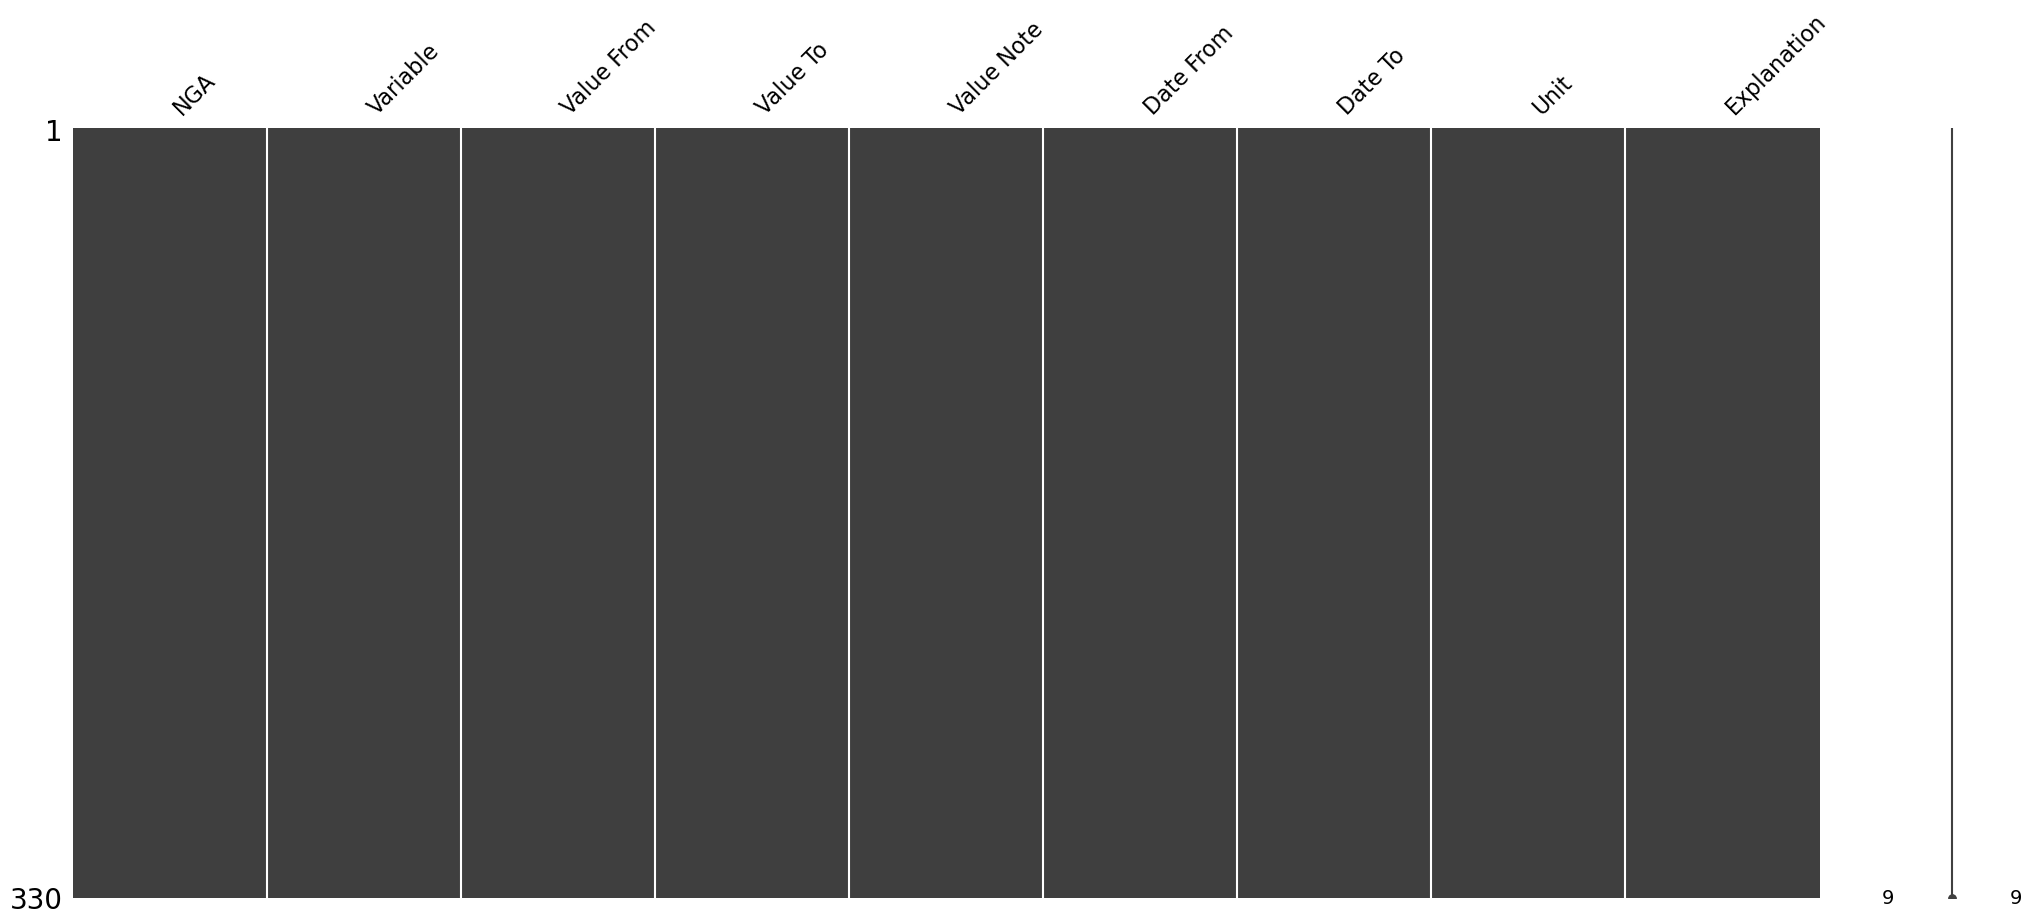

In [25]:
msno.matrix(df)

In [26]:
df.describe()

,Date From,Date To
count,330.000000,330.000000
mean,-1536.809091,1059.727273
std,2867.255946,1447.224197
min,-10000.000000,-7000.000000
25%,-3000.000000,710.000000
50%,-800.000000,1810.000000
75%,930.000000,1914.250000
max,2000.000000,2001.000000


Text(0.5, 1.0, 'Relation betwwen time and NGA')

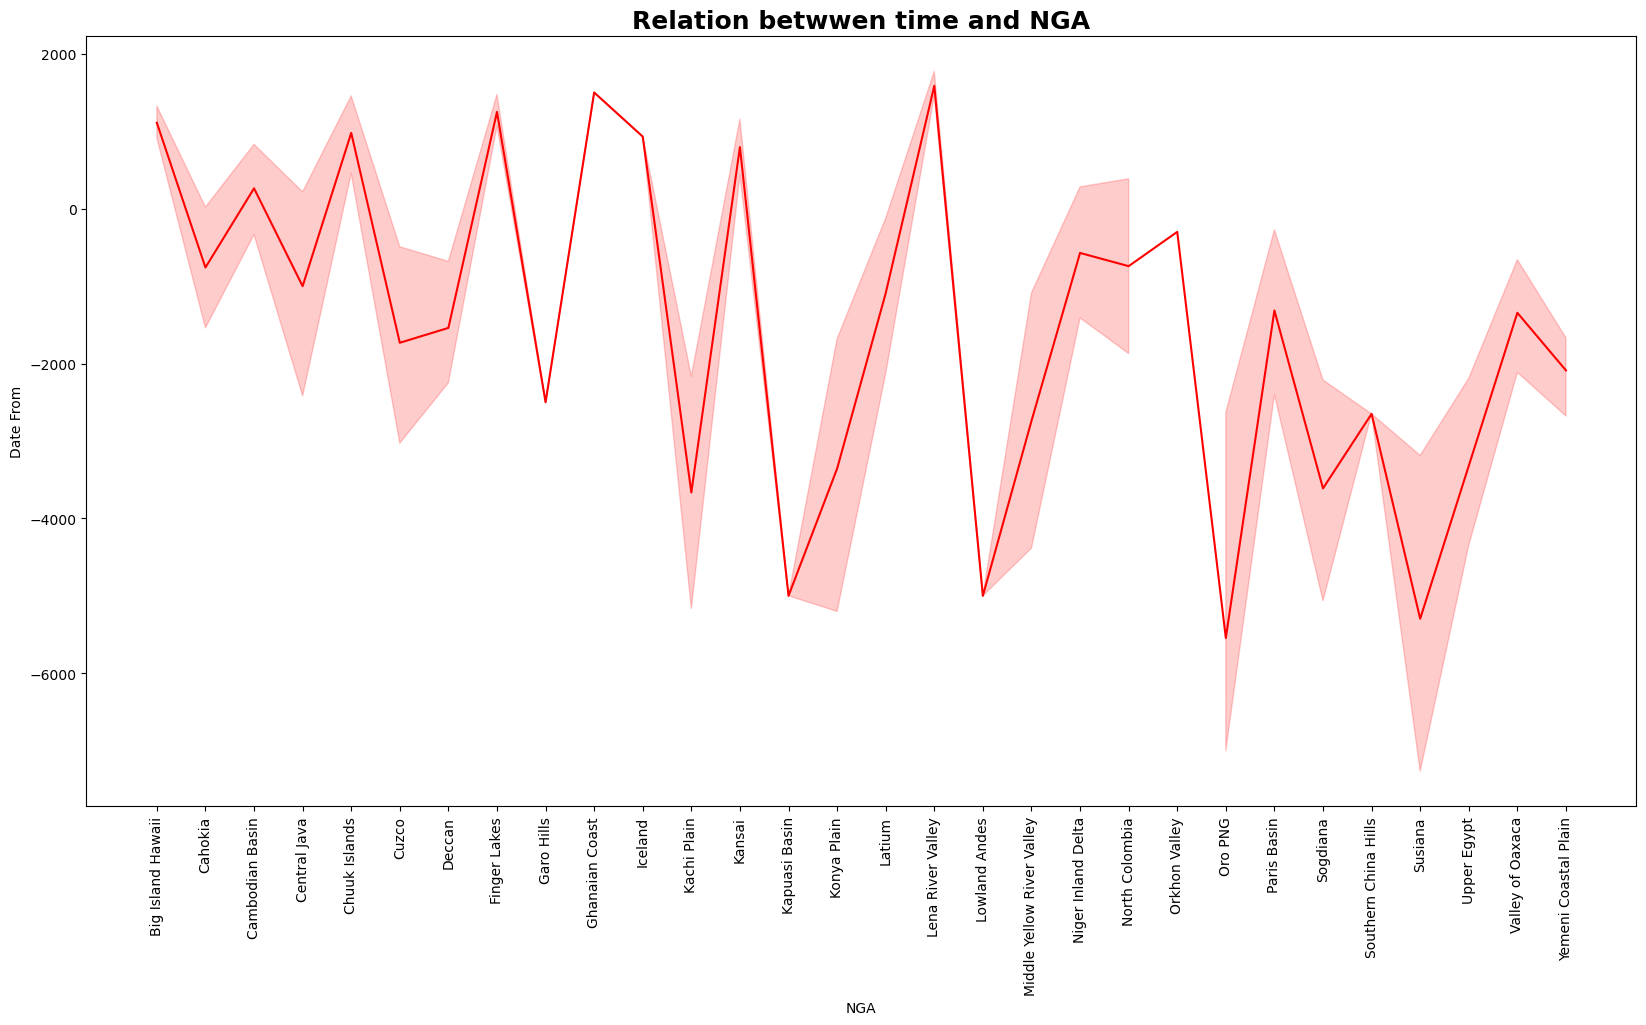

In [27]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df, y="Date From",x='NGA', color='red')
plt.xticks(rotation=90)
plt.title('Relation betwwen time and NGA', fontsize=18, fontweight = "bold")

Text(0.5, 1.0, 'Counts of NGA')

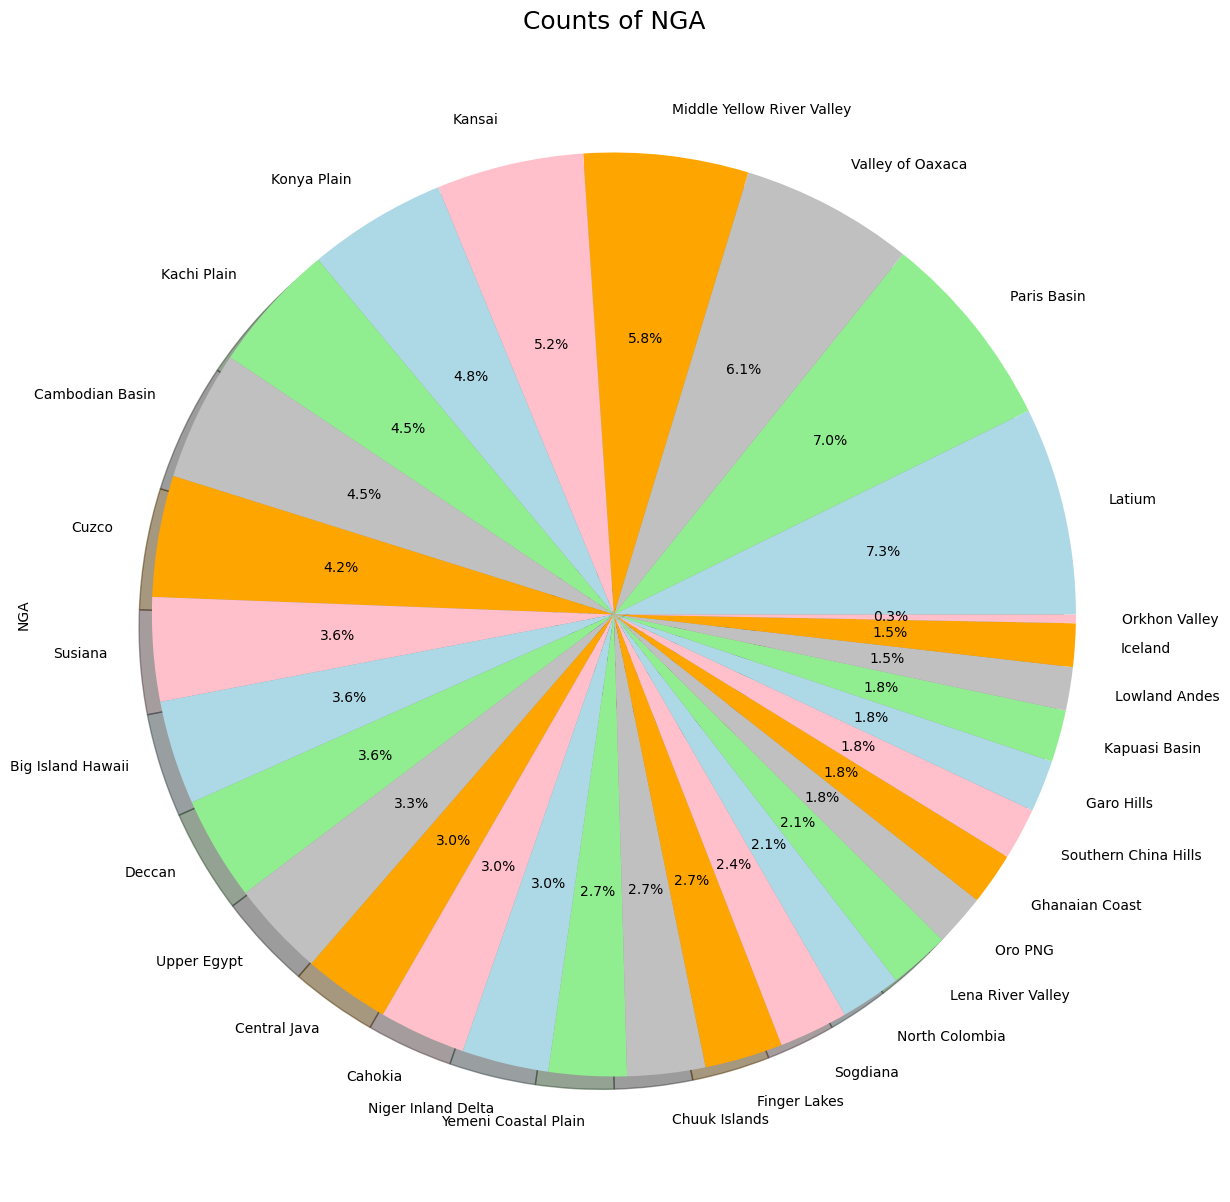

In [28]:
my_colors=['lightblue','lightgreen',
           'silver','orange','pink']
plt.figure(figsize=(15,15))
df.NGA.value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors = my_colors)
plt.title("Counts of NGA", fontsize=18)

In [29]:
df.NGA.nunique()

30

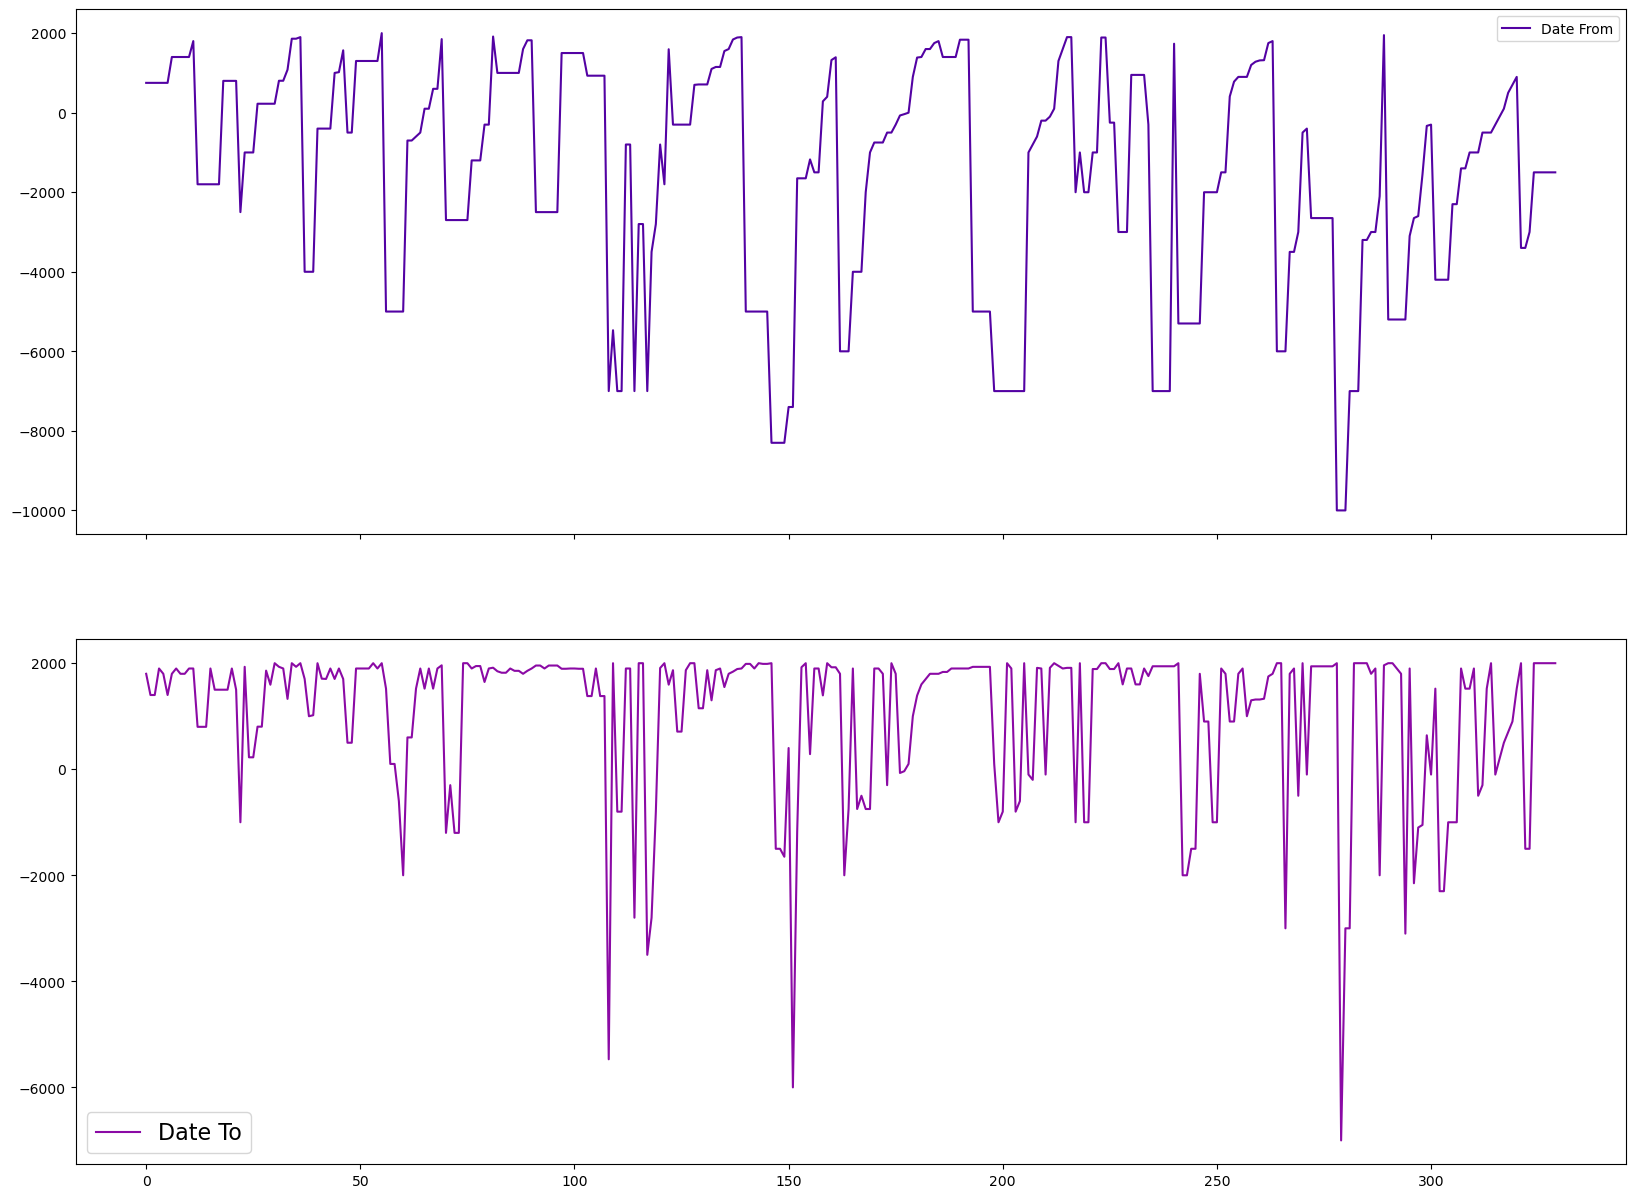

In [30]:
sns.set_palette("plasma")
df.plot(subplots=True, figsize=(20,15))
plt.legend(fontsize=16)
plt.show()

<Figure size 3000x3000 with 0 Axes>

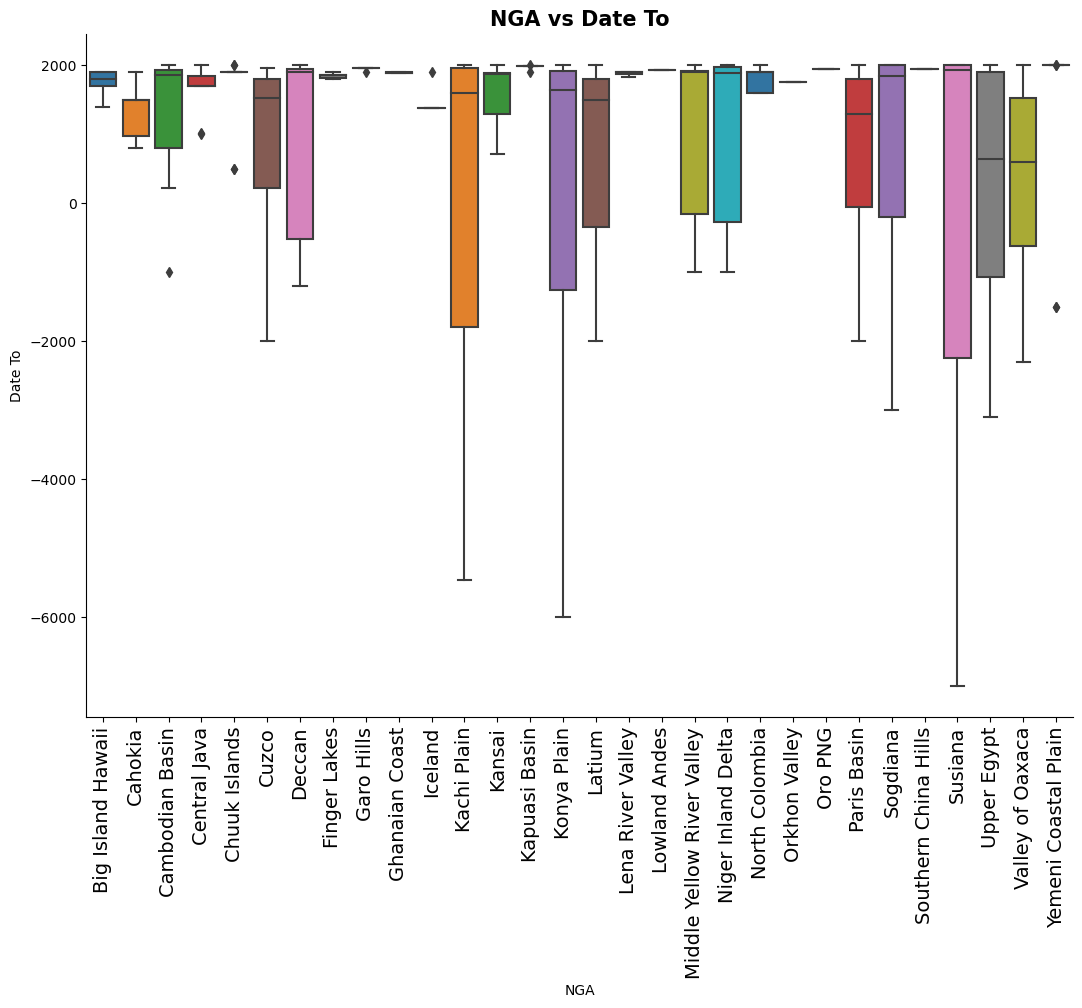

In [31]:
plt.figure(figsize=(30,30))
g = sns.catplot(x="NGA", y="Date To", kind="box",
            data=df.sort_values("NGA"), palette="tab10")
g.fig.set_figwidth(15)
g.fig.set_figheight(8)
plt.title('NGA vs Date To',fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize=14)
plt.show()

<Figure size 3000x3000 with 0 Axes>

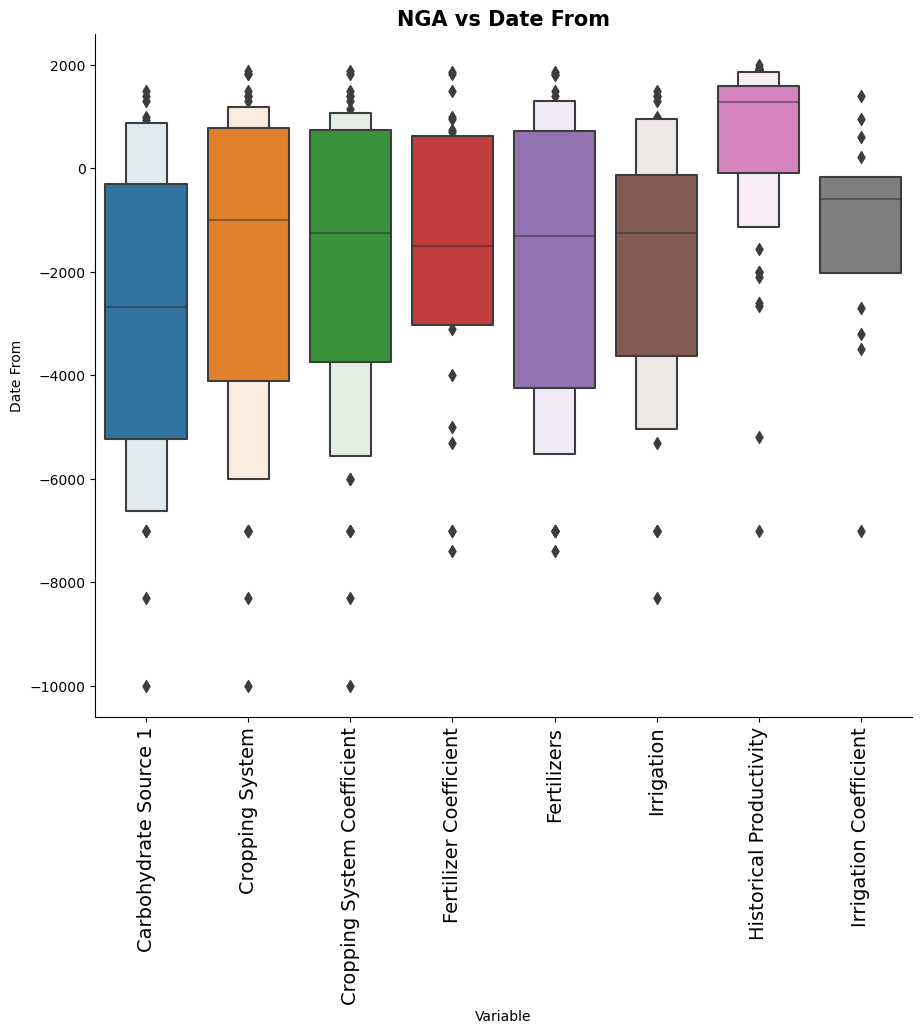

In [32]:
plt.figure(figsize=(30,30))
g = sns.catplot(x="Variable", y="Date From", kind="boxen",
            data=df.sort_values("NGA"), palette="tab10")
g.fig.set_figwidth(12)
g.fig.set_figheight(8)
plt.title('NGA vs Date From',fontsize=15, fontweight='bold')
plt.xticks(rotation=90, fontsize=14)
plt.show()

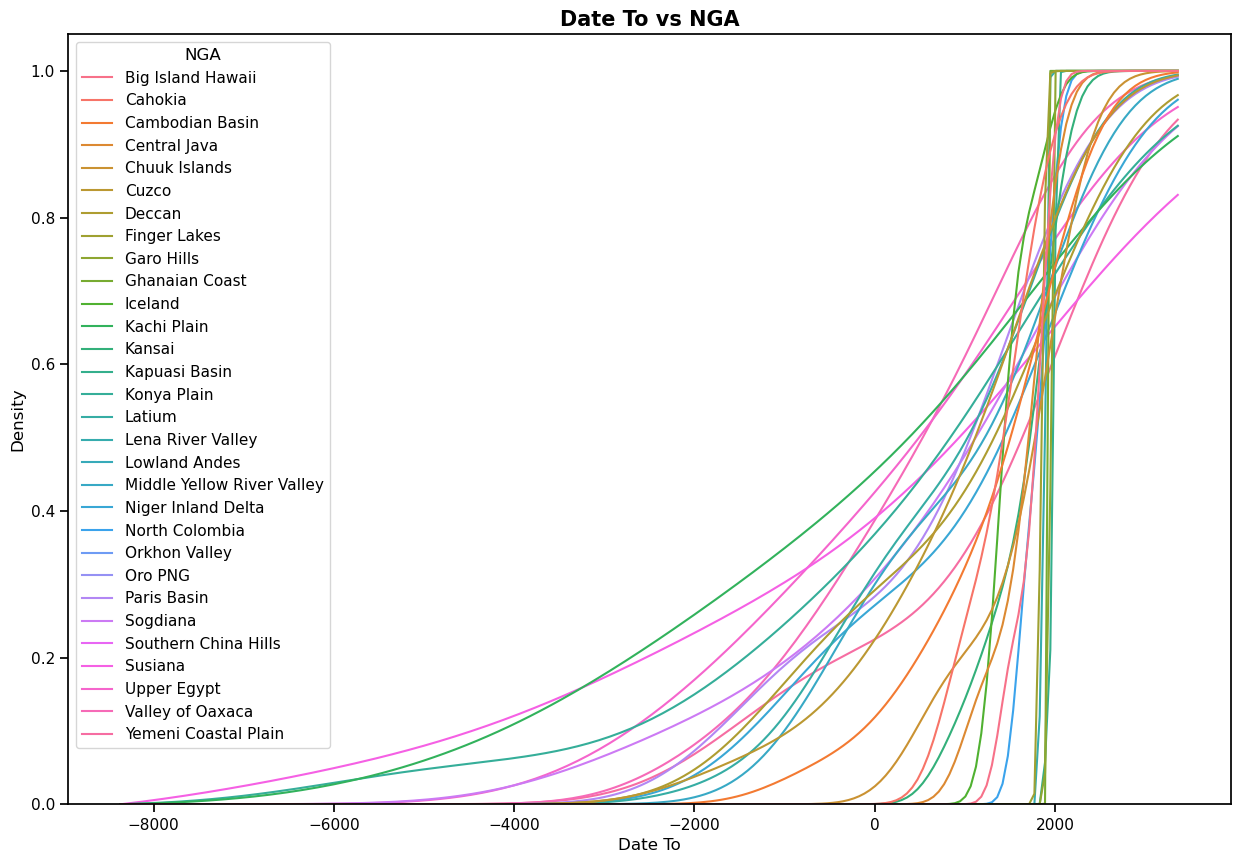

In [33]:
sns.set_palette("rainbow")
plt.figure(figsize=(15, 10))
sns.set_context("notebook",font_scale=1)
sns.kdeplot(data=df, x="Date To", hue="NGA",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.title('Date To vs NGA',fontsize=15, fontweight='bold')

plt.show()

In [34]:
df_yield = df[(df.Unit == 't/ha')]

In [35]:
df_yield

,NGA,Variable,Value From,Value To,Value Note,Date From,Date To,Unit,Explanation
8,Big Island Hawaii,Historical Productivity,3.25,0,0,1400,1800,t/ha,This figure was derived from the mean yield fo...
21,Cahokia,Historical Productivity,0.672,1.681,0,800,1500,t/ha,"""Native maize yields were inherently low and u..."
33,Cambodian Basin,Historical Productivity,1.46,0,0,1080,1327,t/ha,"""Acker has given detailed consideration to the..."
36,Cambodian Basin,Historical Productivity,2.5,0,0,1900,2000,t/ha,An average household is composed of five to si...
46,Central Java,Historical Productivity,1.345,1.681,0,1568,1703,t/ha,"""Even under considerable variation in growing ..."
...,...,...,...,...,...,...,...,...,...
316,Valley of Oaxaca,Historical Productivity,0.7,1,0,-100,200,t/ha,Kowalewski 1980 (see above)
317,Valley of Oaxaca,Historical Productivity,0.8,1.1,0,100,500,t/ha,Kowalewski 1980 (see above)
318,Valley of Oaxaca,Historical Productivity,1,1.4,0,500,700,t/ha,The estimates for the highest quality land (Cl...
319,Valley of Oaxaca,Historical Productivity,1.1,1.5,0,700,900,t/ha,Kowalewski 1980 (see above)


In [36]:
df_yield['NGA'].value_counts()

Latium                        11
Paris Basin                   11
Valley of Oaxaca               7
Upper Egypt                    6
Middle Yellow River Valley     6
Kansai                         6
Chuuk Islands                  2
Cambodian Basin                2
Deccan                         1
Finger Lakes                   1
Kachi Plain                    1
Cahokia                        1
Konya Plain                    1
Cuzco                          1
Oro PNG                        1
Central Java                   1
Sogdiana                       1
Big Island Hawaii              1
Name: NGA, dtype: int64

In [37]:
df_yield['Variable'].unique()

array(['Historical Productivity'], dtype=object)

In [38]:
df_yield['Value From'].unique()

array(['3.25', '0.672', '1.46', '2.5', '1.345', '16', '10', '1.2',
       '1.371', '0.5', '1.096', '1.3', '1.55', '1.5', '1.9', '2.1', '2.2',
       '1', '0.376', '1.296', '1.35', '0.54', '0.23', '0.675', '0.878',
       '0.405', '0.258', '1.05', '0.75', '0.8', '0.25', '6.5', '0.65',
       '0.308', '0.773', '1.624', '1.16', '1.933', '2.22', '0.62', '1.07',
       '1.71', '1.425', '1.665', '1.075', '0.6', '0.7', '1.1', '1.4'],
      dtype=object)

In [39]:
df_yield[['Value From', 'Value To']] = df_yield[['Value From', 'Value To']].apply(pd.to_numeric)
df_yield.dtypes

NGA             object
Variable        object
Value From     float64
Value To       float64
Value Note      object
Date From        int64
Date To          int64
Unit            object
Explanation     object
dtype: object

Text(0.5, 1.0, 'Relation betwwen Productivity and NGA across Time')

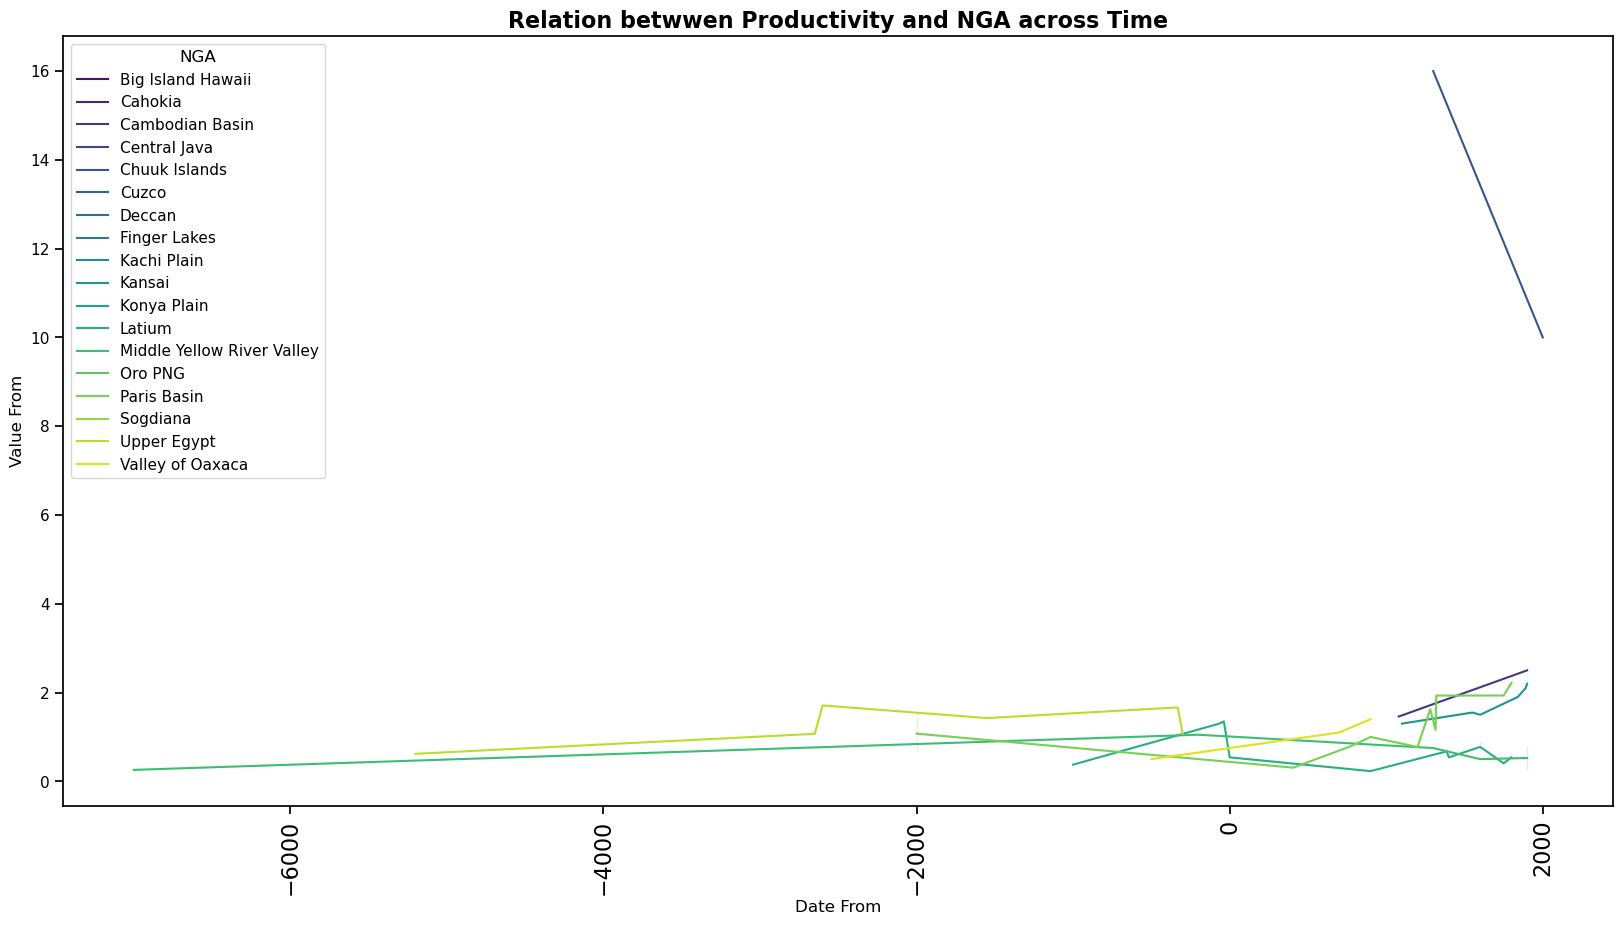

In [40]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_yield, y="Value From",x='Date From', palette='viridis', hue = 'NGA')
plt.xticks(rotation=90, fontsize=16)
plt.title('Relation betwwen Productivity and NGA across Time', fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'Relation betwwen Productivity and NGA - (Value To)')

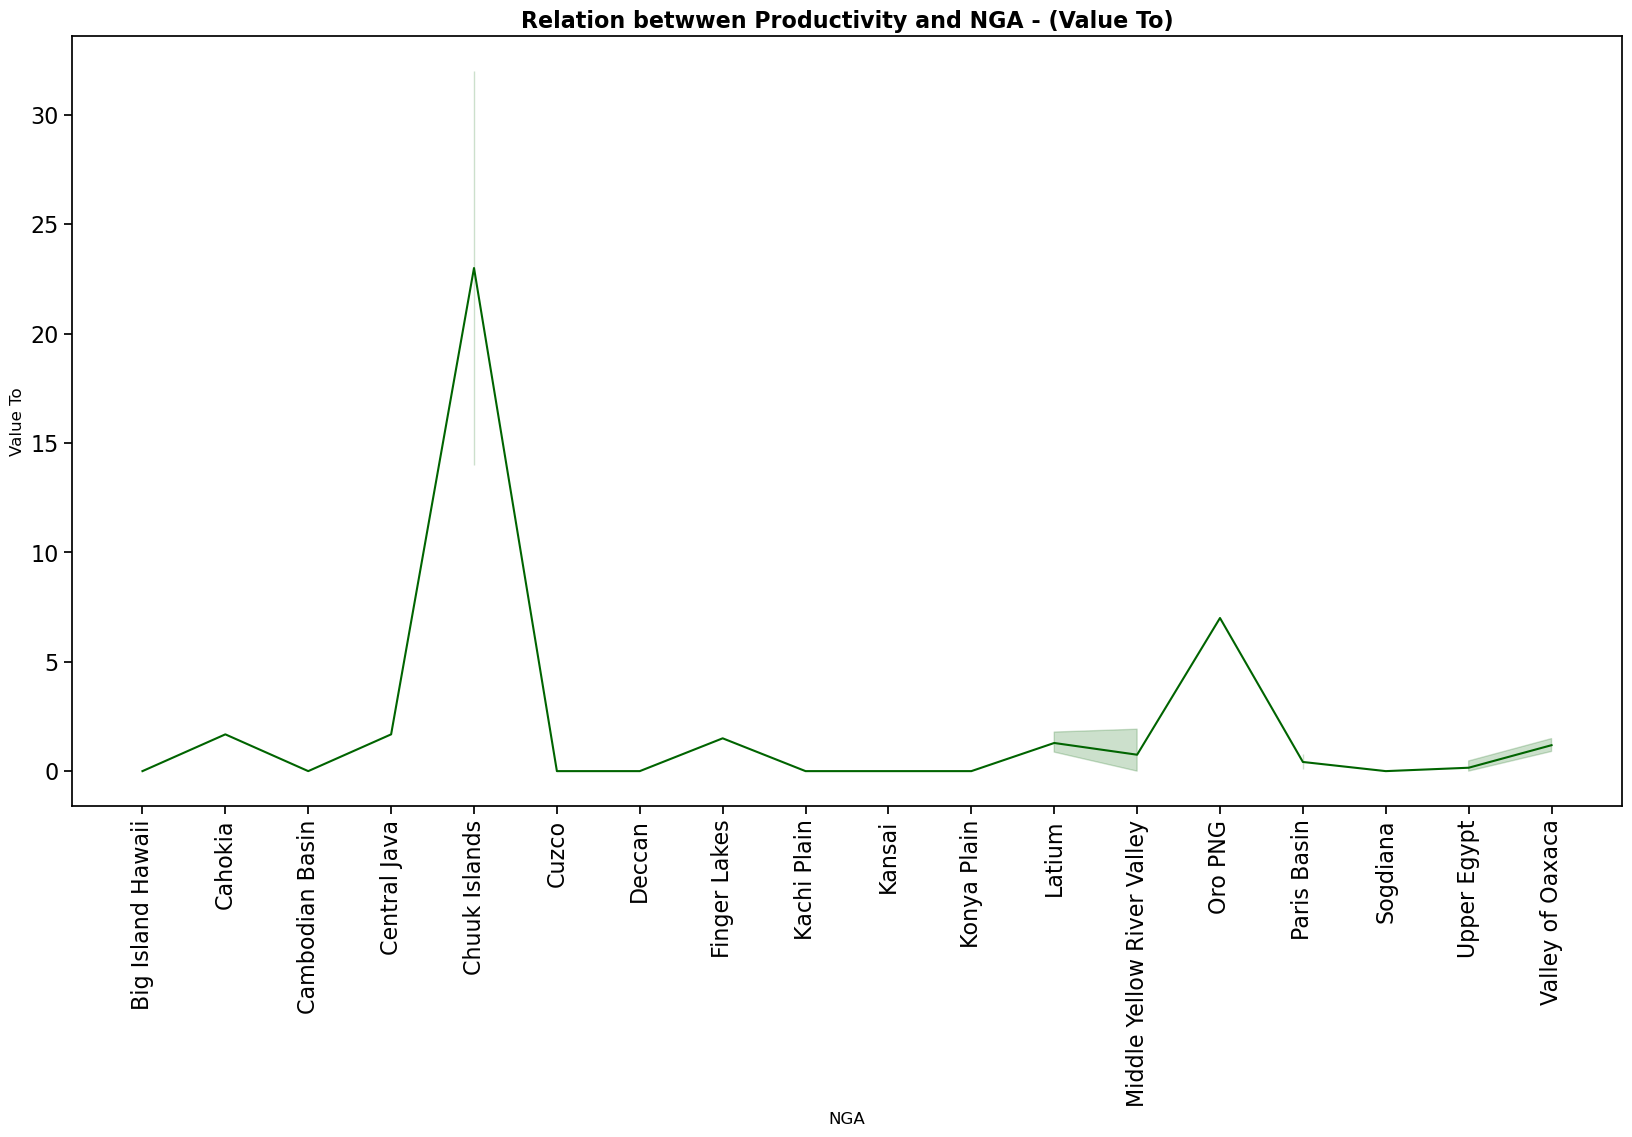

In [41]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_yield, y="Value To",x='NGA', color='darkgreen')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.title('Relation betwwen Productivity and NGA - (Value To)', fontsize=16, fontweight='bold')

In [42]:
df_carb_source = df[(df.Variable == 'Carbohydrate Source 1')]

In [43]:
df_carb_source.head(10)

,NGA,Variable,Value From,Value To,Value Note,Date From,Date To,Unit,Explanation
0,Big Island Hawaii,Carbohydrate Source 1,sweet potato,0,0,750,1800,0,Sweet potato was the the dominant crop in the ...
12,Cahokia,Carbohydrate Source 1,chenopod,0,0,-1800,800,0,Smith and Yarnell 2009
18,Cahokia,Carbohydrate Source 1,maize,0,0,800,1500,0,Need reference
22,Cambodian Basin,Carbohydrate Source 1,rice,0,0,-2500,-1000,0,Bellwood (2005) dates the beginning of the Neo...
23,Cambodian Basin,Carbohydrate Source 1,rice,0,0,-1000,1932,0,"""The staples of their diet were rice and fish,..."
37,Central Java,Carbohydrate Source 1,rice,0,0,-4000,1703,0,"""Recent genetic work tells us that rice, Oryza..."
49,Chuuk Islands,Carbohydrate Source 1,breadfruit,0,0,1300,1900,0,"""In Chuuk the subsistence base of the earliest..."
56,Cuzco,Carbohydrate Source 1,maize,0,inferred,-5000,1520,0,While the Lake Marcacohca pollen cores can ind...
70,Deccan,Carbohydrate Source 1,millet,0,0,-2700,-1200,0,"2700-1200 BCE: ""Cattle and caprine pastoralism..."
76,Deccan,Carbohydrate Source 1,rice,0,0,-1200,1900,0,"""With the expansion in irrigation, rice cultiv..."


Text(0.5, 1.0, 'Relation between Date From and NGA')

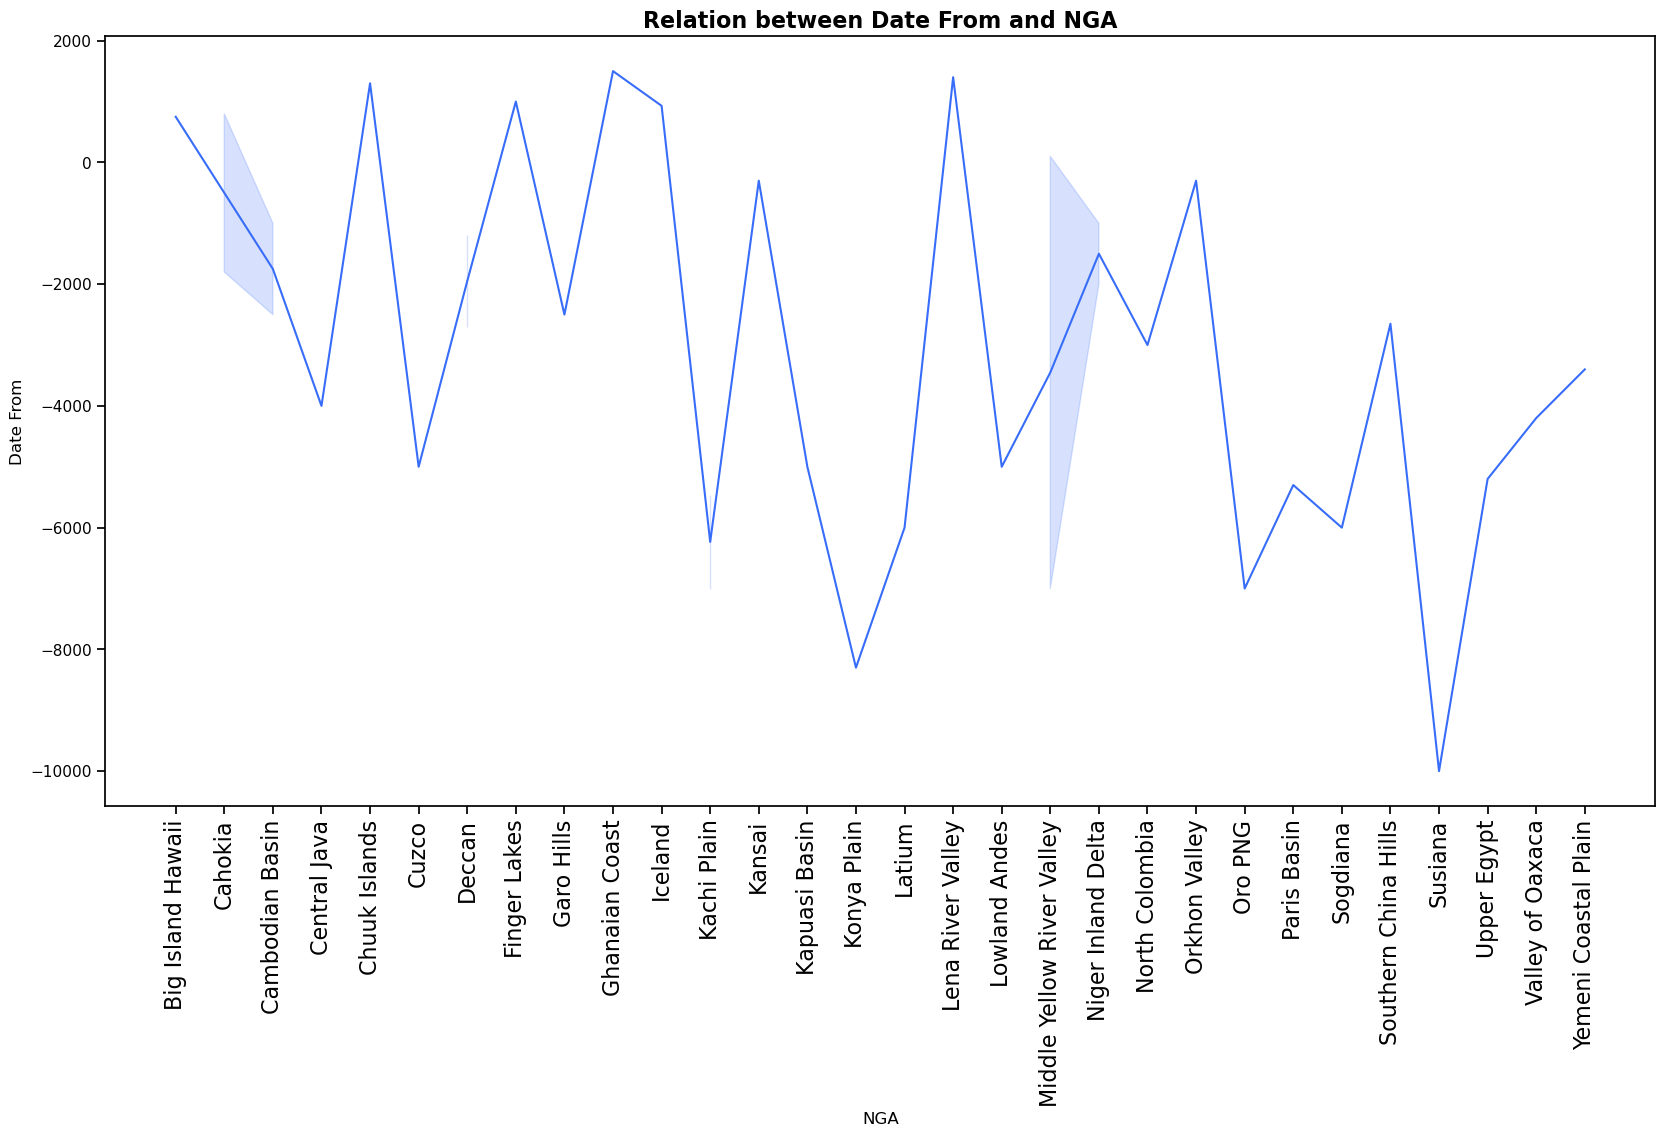

In [44]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=16)
sns.lineplot(x='NGA', y='Date From', data=df_carb_source)
plt.title('Relation between Date From and NGA', fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'Relation between Type of Carbohydrate and NGA')

<Figure size 2000x2000 with 0 Axes>

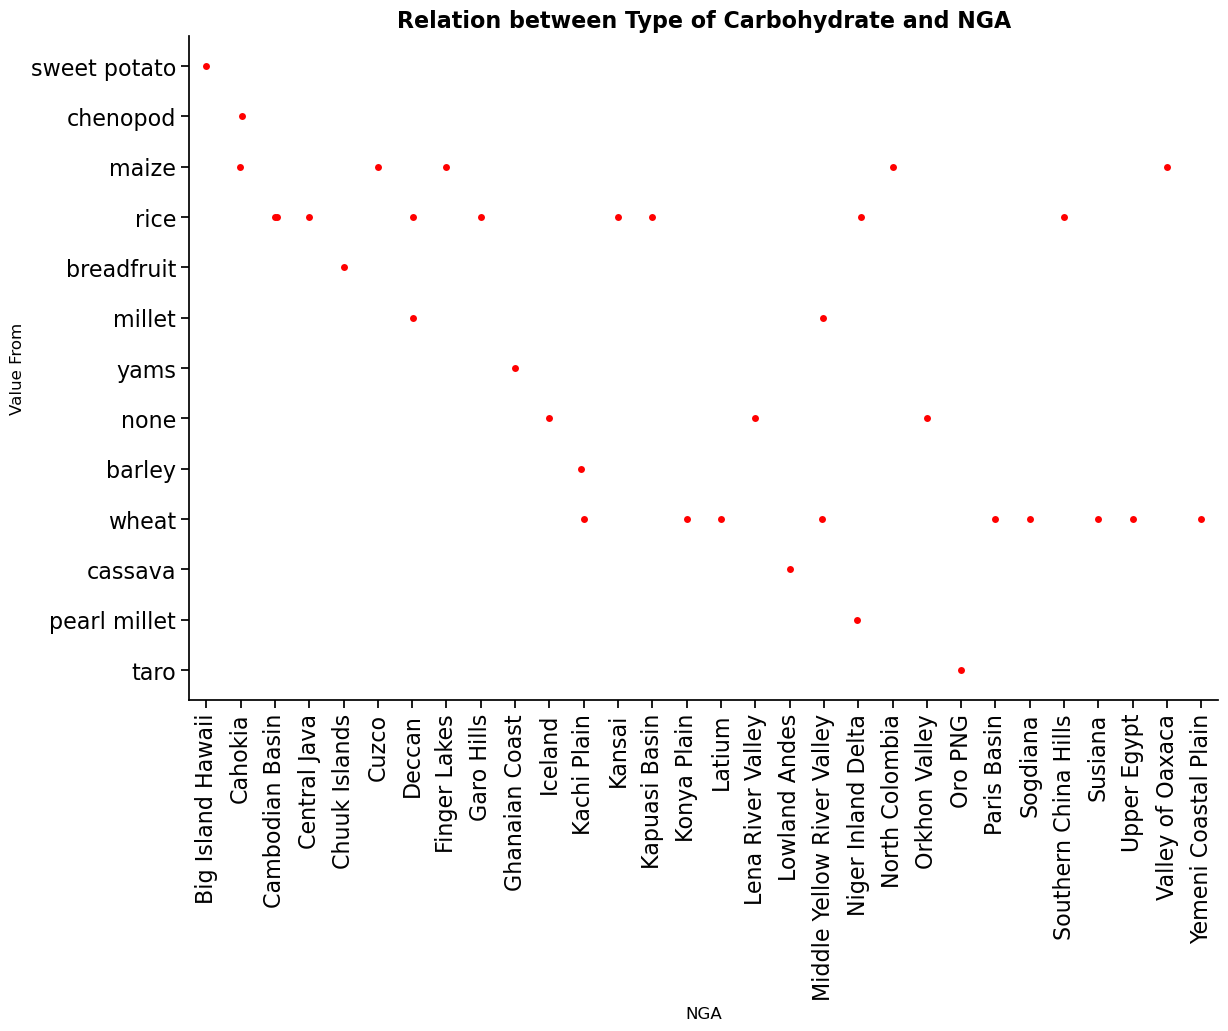

In [45]:
plt.figure(figsize=(20,20))
g = sns.catplot(data=df_carb_source, y="Value From",x='NGA', color='red')
plt.xticks(rotation=90, fontsize=16)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
plt.yticks(fontsize=16)
plt.title('Relation between Type of Carbohydrate and NGA', fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'Count of Different Carbohydrate Sources across NGAs')

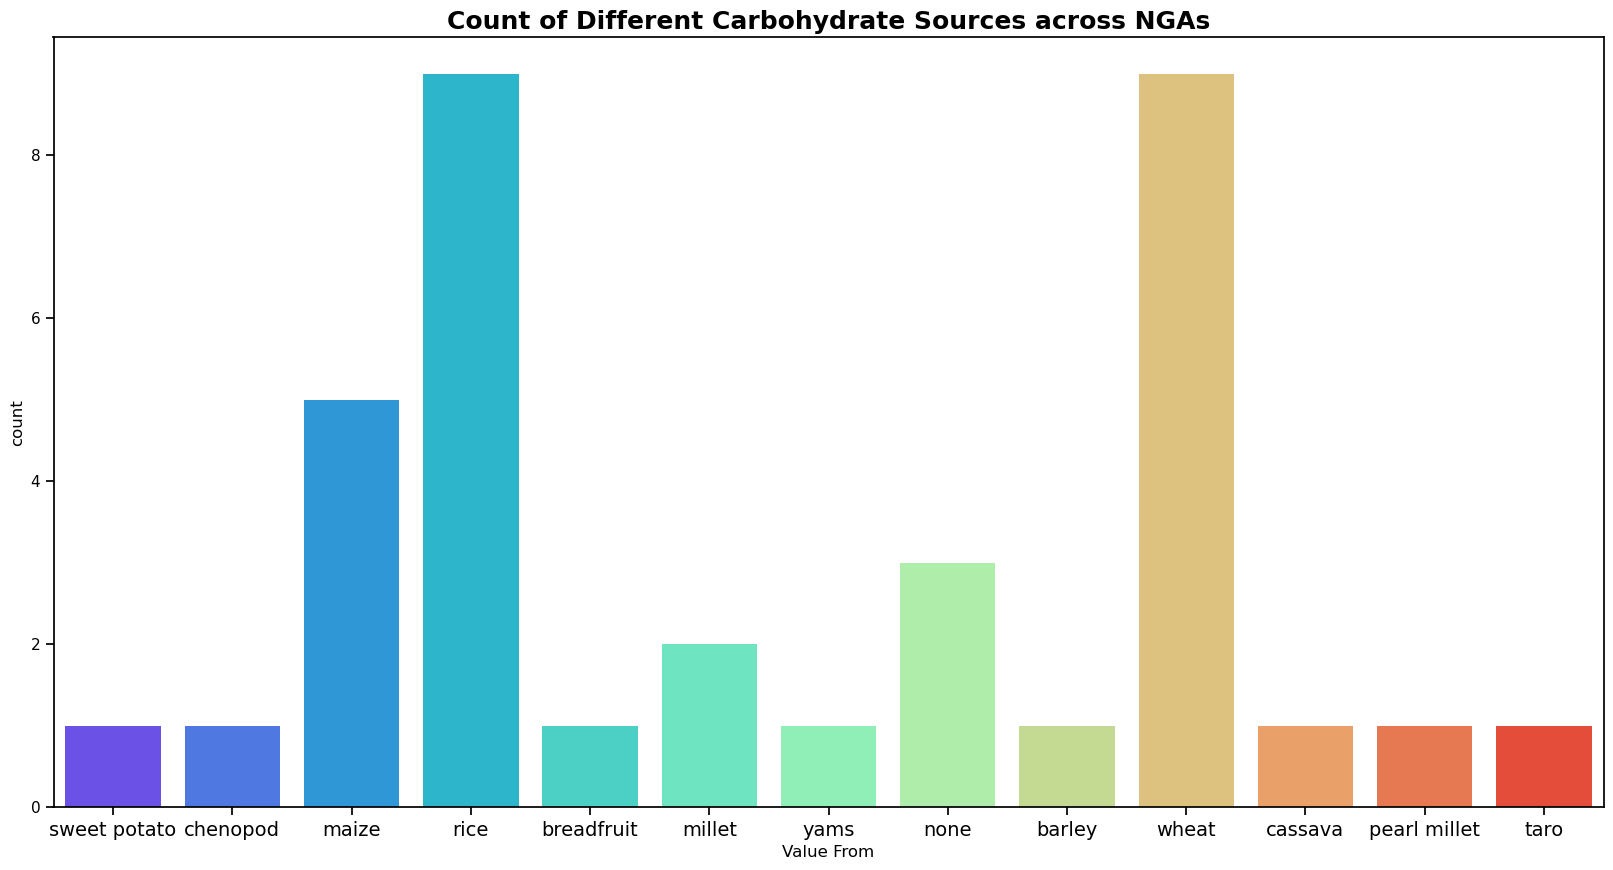

In [46]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_carb_source, x="Value From", palette='rainbow')
plt.xticks(fontsize=14)
plt.title('Count of Different Carbohydrate Sources across NGAs', fontsize=18, fontweight='bold')

In [47]:
df_irrigation = df[(df.Variable == 'Irrigation Coefficient')]
df_irrigation.head(5)
df_irrigation[['Value From', 'Value To']] = df_irrigation[['Value From', 'Value To']].apply(pd.to_numeric)

Text(0.5, 1.0, 'Coefficient of Irrigation across NGAs')

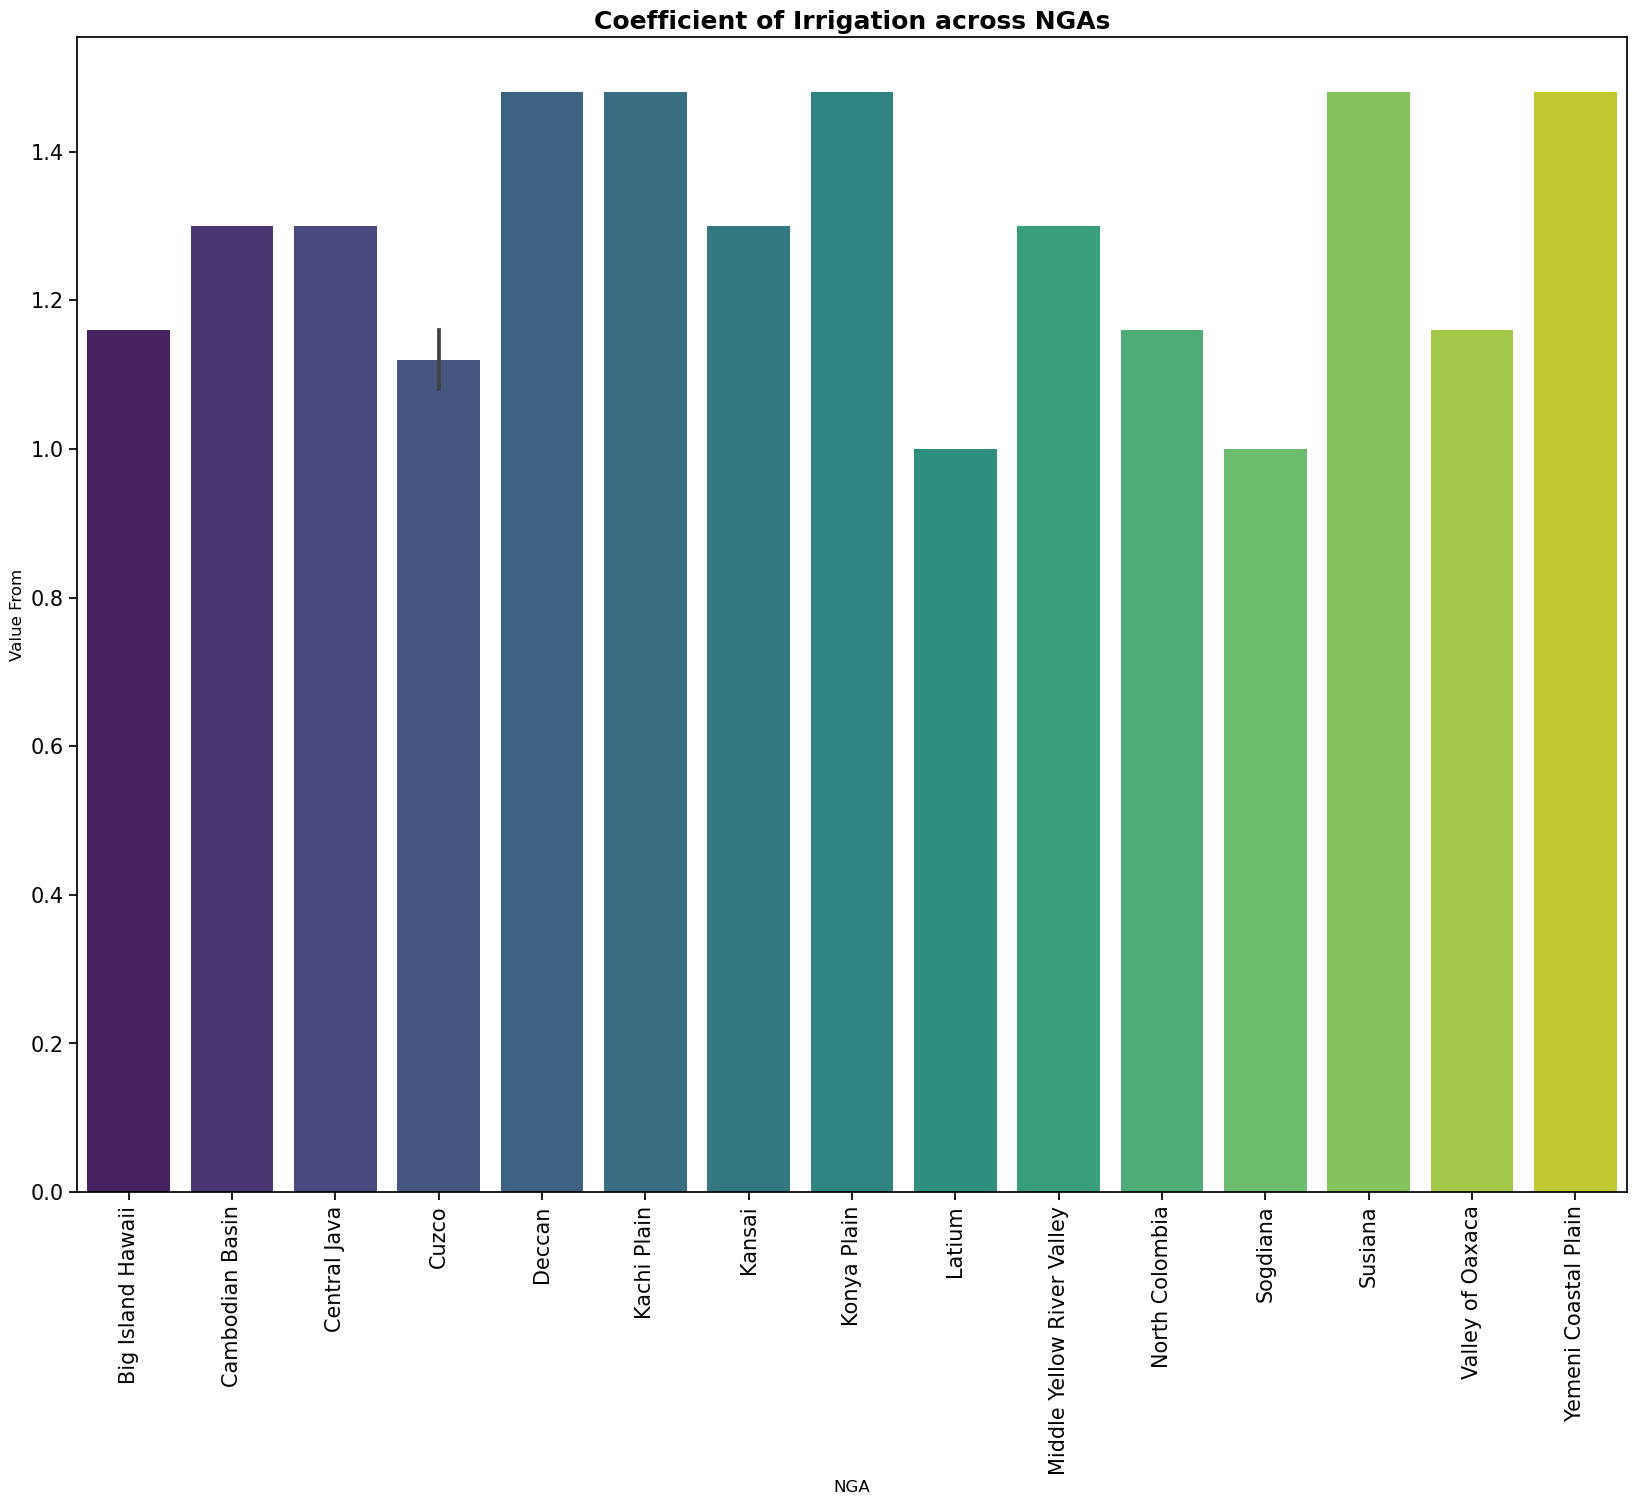

In [48]:
plt.figure(figsize=(20,15))
sns.barplot(data=df_irrigation, x="NGA", y="Value From", palette="viridis")
plt.xticks(fontsize=15, rotation = 90)
plt.yticks(fontsize=15)
plt.title('Coefficient of Irrigation across NGAs', fontsize=18, fontweight='bold')

In [49]:
df_fertilizer = df[(df.Variable == 'Fertilizer Coefficient')]
df_fertilizer.head(5)
df_fertilizer[['Value From', 'Value To']] = df_fertilizer[['Value From', 'Value To']].apply(pd.to_numeric)

Text(0.5, 1.0, 'Coefficient of Fertilizer across NGAs')

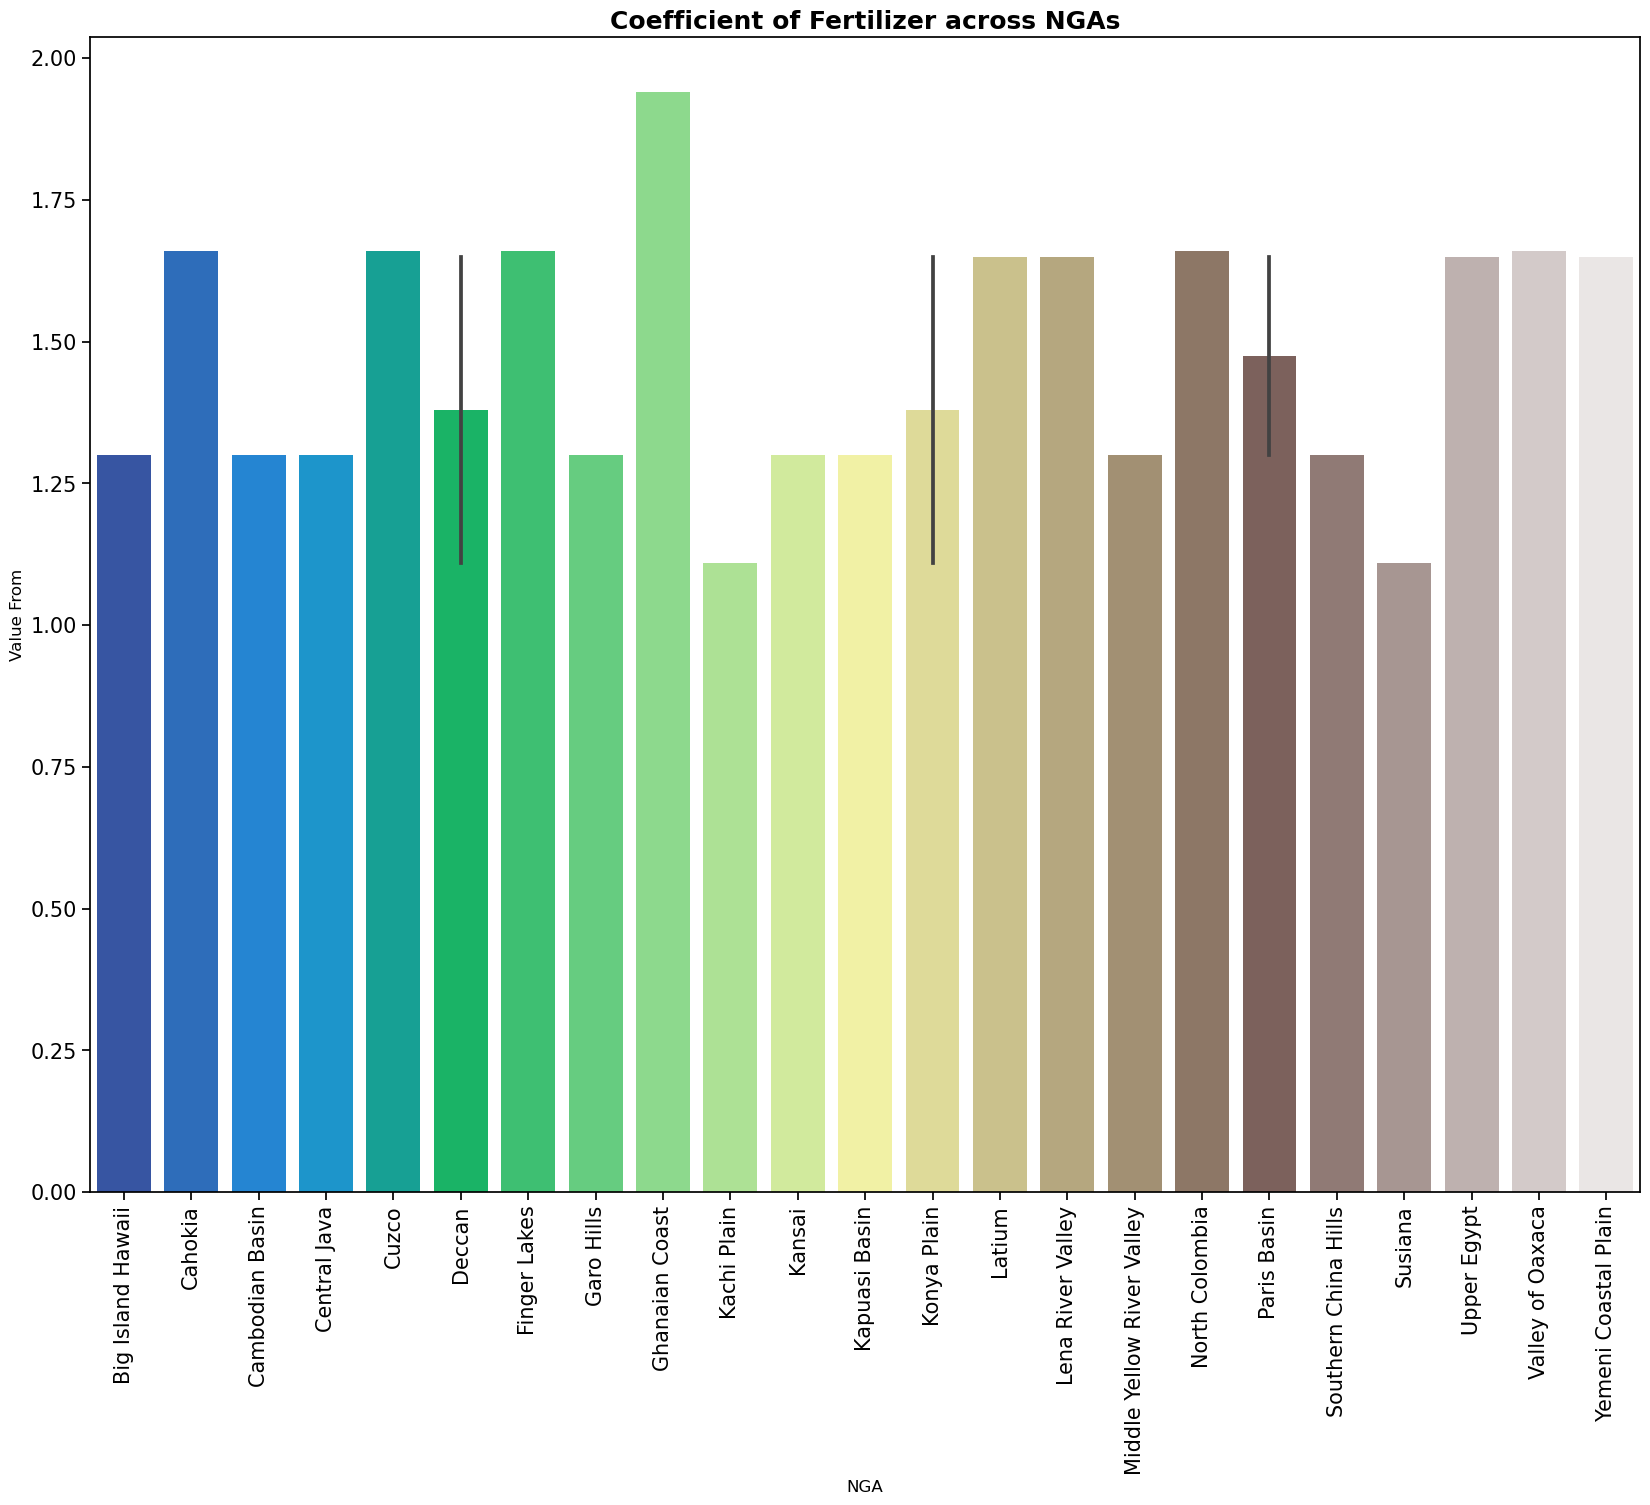

In [50]:
plt.figure(figsize=(20,15))
sns.barplot(data=df_fertilizer, x="NGA", y="Value From", palette="terrain")
plt.xticks(fontsize=15, rotation = 90)
plt.yticks(fontsize=15)
plt.title('Coefficient of Fertilizer across NGAs', fontsize=18, fontweight='bold')